# Statistics of KuaiRec

We provide some basic statistics of the KuaiRec dataset. The description of this dataset can be referred to https://chongminggao.github.io/KuaiRec/

## Load data

In [1]:
# If you are running locally, make sure you are in the directory of KuaiRec.
rootpath="./"

If you are using Google Colab, make sure you have added shortcut of this [shared link](https://drive.google.com/drive/folders/1bAm07YnKRKB6SVHB8Mqz6v6W8ppLaJwB) to your own Google Drive. Then, you should load it from your space by indicating the correct path as follows.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# rootpath="./drive/MyDrive/Datasets/KuaiRec/" # Make sure this path corresponds to KuaiRec in your Drive.

In [2]:
import pandas as pd

print("Loading big matrix...")
big_matrix = pd.read_csv(rootpath + "data/big_matrix.csv")
print("Loading small matrix...")
small_matrix = pd.read_csv(rootpath + "data/small_matrix.csv")
print("Loading matrix_2month...")
matrix_2month = pd.read_csv(rootpath + "matrix_2month.csv")


print("Loading social network...")
social_network = pd.read_csv(rootpath + "data/social_network.csv")
social_network["friend_list"] = social_network["friend_list"].map(eval)

print("Loading item features...")
item_categories = pd.read_csv(rootpath + "data/item_categories.csv")
item_categories["feat"] = item_categories["feat"].map(eval)

print("Loading user features...")
user_features = pd.read_csv("data/user_features.csv")

print("Loading items' daily features...")
item_daily_features = pd.read_csv("data/item_daily_features.csv")

print("All data loaded.")

Loading big matrix...
Loading small matrix...
Loading social network...
Loading item features...
Loading user features...
Loading items' daily features...
All data loaded.


## Statistics 

In [4]:
big_matrix

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000
...,...,...,...,...,...,...,...,...
12530801,7175,1281,34618,140017,2020-09-05 15:07:10.576,20200905,1.599290e+09,0.247241
12530802,7175,3407,12619,21888,2020-09-05 15:08:45.228,20200905,1.599290e+09,0.576526
12530803,7175,10360,2407,7067,2020-09-05 19:10:29.041,20200905,1.599304e+09,0.340597
12530804,7175,10360,6455,7067,2020-09-05 19:10:36.995,20200905,1.599304e+09,0.913400


In [ ]:
def get_ratio_label(x):
    if x['watch_ratio'] >1:
        return 1
    if x['watch_ratio'] <=1:
        return 0

big_matrix.loc[:,'ratio_label'] = big_matrix.apply(get_ratio_label,axis = 1)

In [3]:
small_matrix

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364
...,...,...,...,...,...,...,...,...
4676565,7162,2267,11908,5467,NaN,NaN,NaN,2.178160
4676566,7162,2065,11919,6067,NaN,NaN,NaN,1.964562
4676567,7162,1296,16690,19870,NaN,NaN,NaN,0.839960
4676568,7162,4822,11862,24400,NaN,NaN,NaN,0.486148


In [4]:
small_matrix['date'].value_counts()#.unique()

20200730.0    128084
20200731.0    126673
20200729.0    120676
20200806.0    118003
20200805.0    115568
               ...  
20200901.0     20246
20200902.0     14746
20200903.0     10247
20200904.0      5062
20200905.0      2931
Name: date, Length: 63, dtype: int64

## 非空small matrix的统计

In [3]:
matrix_2month = small_matrix[small_matrix['date'].notnull()].copy()#取出time非空的数据
matrix_2month

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364
...,...,...,...,...,...,...,...,...
4676370,7162,9177,5315,37205,2020-09-01 20:06:35.984,20200901.0,1.598962e+09,0.142857
4676371,7162,4987,10085,8167,2020-09-02 14:44:51.342,20200902.0,1.599029e+09,1.234848
4676372,7162,7988,50523,49319,2020-09-03 08:45:01.474,20200903.0,1.599094e+09,1.024412
4676373,7162,6533,2190,8000,2020-09-04 22:56:32.021,20200904.0,1.599231e+09,0.273750


In [4]:
def get_ratio_label(x):#筛选，时间较长，可不运行
    if x['watch_ratio'] >= 2:
        return 1
    if x['watch_ratio'] < 2:
        return 0

matrix_2month.loc[:,'ratio_label'] = matrix_2month.apply(get_ratio_label,axis = 1)

In [7]:
matrix_2month.to_csv('matrix_2month.csv')#保存结果，可不运行

In [ ]:
matrix_2month

In [8]:
data = matrix_2month.groupby('date')['ratio_label'].sum()#总体，按照每日统计
data

date
20200705.0    1878
20200706.0    2324
20200707.0    3013
20200708.0    3380
20200709.0    3636
              ... 
20200901.0    1519
20200902.0     725
20200903.0     432
20200904.0     225
20200905.0      84
Name: ratio_label, Length: 63, dtype: int64

In [24]:
#matrix_2month.set_index(pd.to_datetime(matrix_2month["time"]), inplace=True)
#matrix_2month

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,ratio_label
time,,,,,,,,,
2020-07-05 05:27:48.378,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103,0
2020-07-05 05:28:00.057,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377,0
2020-07-05 05:29:09.479,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311,1
2020-07-05 05:30:43.285,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388,0
2020-07-05 05:35:43.459,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364,0
...,...,...,...,...,...,...,...,...,...
2020-09-01 20:06:35.984,7162,9177,5315,37205,2020-09-01 20:06:35.984,20200901.0,1.598962e+09,0.142857,0
2020-09-02 14:44:51.342,7162,4987,10085,8167,2020-09-02 14:44:51.342,20200902.0,1.599029e+09,1.234848,0
2020-09-03 08:45:01.474,7162,7988,50523,49319,2020-09-03 08:45:01.474,20200903.0,1.599094e+09,1.024412,0


In [15]:
stat1 = matrix_2month[matrix_2month['date'] <=20200821.0].copy()#按每周统计，展示效果
stat1["week"] = pd.to_datetime(stat1["time"]).map(lambda x: x.week-26)
stat1

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio,ratio_label,week
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103,0,1
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377,0,1
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311,1,1
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388,0,1
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364,0,1
...,...,...,...,...,...,...,...,...,...,...
4676133,7162,1227,2133,14171,2020-08-21 11:31:09.355,20200821.0,1.597981e+09,0.150519,0,8
4676134,7162,7745,11844,8188,2020-08-21 11:55:51.59,20200821.0,1.597982e+09,1.446507,0,8
4676135,7162,4270,11893,8300,2020-08-21 12:03:43.696,20200821.0,1.597983e+09,1.432892,0,8
4676136,7162,3104,5401,9621,2020-08-21 12:13:46.096,20200821.0,1.597983e+09,0.561376,0,8


In [22]:
stat1 = matrix_2month[matrix_2month['date'] <=20200821.0].copy()#前两个月（不包括最后的15天）按每周统计
stat1["week"] = pd.to_datetime(stat1["time"]).map(lambda x: x.week-26)
#stat1["month"] = stat1['time'].str.replace("-", "").str.slice(0, 6) #也可改成按月统计
stat1.set_index(stat1["week"],inplace=True)
stat2 = matrix_2month[matrix_2month['date'] > 20200821.0].copy()#后15天按每天统计
stat2["day"] = stat2['time'].str.replace("-", "").str.slice(0, 8)
stat2.set_index(stat2["day"],inplace=True)

In [23]:
s1 = stat1.groupby(stat1['week'])["ratio_label"].sum()#分组汇聚点赞数
s2 = stat2.groupby(stat2['day'])["ratio_label"].sum()
stat = pd.concat([s1,s2])#拼接两表
#stat.plot()

<AxesSubplot:>

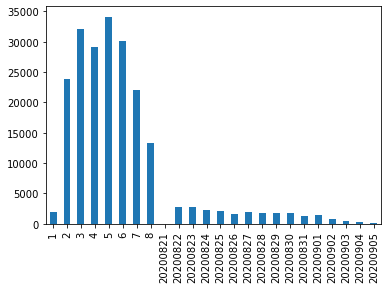

In [24]:
import matplotlib.pyplot as plt
stat.plot(kind='bar')

In [25]:
matrix_15day = small_matrix[small_matrix['date'].isnull()].copy()
matrix_15day

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
3234,14,6177,4407,7013,NaN,NaN,NaN,0.628404
3235,14,5639,8453,57880,NaN,NaN,NaN,0.146044
3236,14,1268,4478,9534,NaN,NaN,NaN,0.469687
3237,14,7126,11563,57669,NaN,NaN,NaN,0.200506
3238,14,10394,11436,23584,NaN,NaN,NaN,0.484905
...,...,...,...,...,...,...,...,...
4676565,7162,2267,11908,5467,NaN,NaN,NaN,2.178160
4676566,7162,2065,11919,6067,NaN,NaN,NaN,1.964562
4676567,7162,1296,16690,19870,NaN,NaN,NaN,0.839960
4676568,7162,4822,11862,24400,NaN,NaN,NaN,0.486148


In [ ]:
def get_ratio_label(x):
    if x['watch_ratio'] >1:
        return 1
    if x['watch_ratio'] <=1:
        return 0

matrix_15day.loc[:,'ratio_label'] = matrix_15day.apply(get_ratio_label,axis = 1)

In [23]:
matrix_15day['ratio_label'].value_counts()

0    138814
1     43178
Name: ratio_label, dtype: int64